Q-3. Consider the ‘Blood Pressure Before’ and ‘Blood Pressure After’ columns from the data and calculate the following
https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_
a. Measure the dispersion in both and interpret the results. 
b. Calculate mean and 5% confidence interval and plot it in a graph 
c. Calculate the Mean absolute deviation and Standard deviation and interpret the results. 
d. Calculate the correlation coefficient and check the significance of it at 1% level
of significance.

In [13]:
import pandas as pd
import numpy as np

In [23]:
import scipy.stats as stats
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('data.csv')
df

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140
...,...,...,...
95,96,136,129
96,97,143,137
97,98,127,123
98,99,139,135


In [6]:
df[' Blood Pressure Before (mmHg)']

0     130
1     142
2     120
3     135
4     148
     ... 
95    136
96    143
97    127
98    139
99    135
Name:  Blood Pressure Before (mmHg), Length: 100, dtype: int64

In [7]:
df.describe()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
count,100.000000,100.000000,100.000000
mean,50.500000,133.910000,128.360000
std,29.011492,6.598278,6.888022
min,1.000000,120.000000,118.000000
25%,25.750000,128.000000,123.000000
50%,50.500000,135.000000,128.000000
75%,75.250000,139.250000,135.000000
max,100.000000,148.000000,141.000000


In [8]:
range_before = df[' Blood Pressure Before (mmHg)'].max() - df[' Blood Pressure Before (mmHg)'].min()
range_before

28

In [10]:
range_after = df[' Blood Pressure After (mmHg)'].max() - df[' Blood Pressure After (mmHg)'].min()
range_after

23

In [11]:
variance_before = df[' Blood Pressure Before (mmHg)'].var()
variance_before

43.53727272727271

In [12]:
variance_after = df[' Blood Pressure After (mmHg)'].var()
variance_after

47.4448484848485

#### Interpretation of result

BP measured after has less varaibility as conpared to BP before as the range is reduced. This may also mean that BP after tends to move towards normal range which is 120 mmHg
BP after deviates more around the mean than BP before as the variance of BP after is higher

#### a. Measure the dispersion in both and interpret the results

In [20]:
dispersion_before = np.var(df[' Blood Pressure Before (mmHg)'])
dispersion_after = np.var(df[' Blood Pressure Before (mmHg)'])
print("Dispersion in Blood Pressure Before:", dispersion_before)
print("Dispersion in Blood Pressure After:", dispersion_after)

Dispersion in Blood Pressure Before: 43.10189999999998
Dispersion in Blood Pressure After: 43.10189999999998


#### b. Calculate mean and 5% confidence interval and plot it in a graph

In [25]:
mean_before = np.mean(df[' Blood Pressure Before (mmHg)'])
mean_after = np.mean(df[' Blood Pressure After (mmHg)'])
confidence_interval = stats.t.interval(0.95, len(df)-1, loc=mean_before, scale=stats.sem(df[' Blood Pressure Before (mmHg)']))
print("Mean of Blood Pressure Before:", mean_before)
print("5% Confidence Interval of Blood Pressure Before:", confidence_interval)

Mean of Blood Pressure Before: 133.91
5% Confidence Interval of Blood Pressure Before: (132.60075849172767, 135.21924150827232)


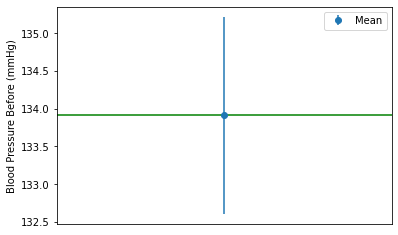

In [35]:
# Plotting the graph
plt.errorbar(x=1, y=mean_before, yerr=(confidence_interval[1] - mean_before), fmt='o', label='Mean')
plt.axhline(mean_before, color='g')
plt.xticks([], [])
plt.ylabel('Blood Pressure Before (mmHg)')
plt.legend()
plt.show()

#### c. Calculating the Mean absolute deviation and Standard deviation and interpret the results

In [39]:
mad_bf = np.mean(np.abs(df[' Blood Pressure Before (mmHg)'] - np.mean(df[' Blood Pressure Before (mmHg)'])))
mad_af = np.mean(np.abs(df[' Blood Pressure After (mmHg)'] - np.mean(df[' Blood Pressure After (mmHg)'])))
std_dev_bf = np.std(df[' Blood Pressure Before (mmHg)'])
std_dev_af = np.std(df[' Blood Pressure After (mmHg)'])
print("Mean Absolute Deviation of Blood Pressure Before:", mad_bf)
print("Mean Absolute Deviation of Blood Pressure After:", mad_af)
print("Standard Deviation of Blood Pressure Before:", std_dev_bf)
print("Standard Deviation of Blood Pressure After:", std_dev_af)

Mean Absolute Deviation of Blood Pressure Before: 5.7118
Mean Absolute Deviation of Blood Pressure After: 5.9
Standard Deviation of Blood Pressure Before: 6.5652037287505385
Standard Deviation of Blood Pressure After: 6.853495458523338


#### d. Calculate the correlation coefficient and check the significance at 1% level of significance

In [38]:
correl_cof, p_value = stats.pearsonr(df[' Blood Pressure Before (mmHg)'], df[' Blood Pressure After (mmHg)'])
print("Correlation Coefficient:", correl_cof)
print("p-value:", p_value)
if p_value < 0.01:
    print("Correlation is significant at 1% level of significance.")
else:
    print("Correlation is not significant at 1% level of significance.")

Correlation Coefficient: 0.9779485966556023
p-value: 1.8097381433050877e-68
Correlation is significant at 1% level of significance.
